# Predicting Fertility Based on Health Statistics   



Fertility rate is measured as the total number of births for women of child bearing age per 1000 live births.  The total fertility rate is a significant indicator of a nation's population growth or population decline.  The fertility rate is affected by a range of factors including health, population dynamics, economic status, and socioeconomic factors.   

Fertility rates for 21 countries across all 7 continents will be analyzed and compared to determine the most significant factors affecting fertility.  Countries were selected by continent based on available data.  The 3 countries with the most data were selected from each continent.  As Antarctica is populated by approximately 5,000 transitional residents, there is no data from this continent.  To compensate for the lack of data from Antarctica, 5 countries were chosen from Asia, which is the largest and most populated continent.  Four countries were selected from Africa, which is the second largest and most populated continent.  Three countries each were selected from North America, South America, Europe and Australia/Oceania.  

This dataset answers some basic questions including which country has the highest average fertility rate?  Which country has the most stable fertility rate?  What are the most significant features affecting fertility rates?  


## Data Summary:  

The World Bank's Health, Nutrition and Population Statistics database provides key health, nutrition and population statistics gathered from a variety of international and national sources.  This dataset contains health, nutrition and population information for 217 countries and regions.  Themes include global surgery, health financing, HIV/AIDS, immunization, infectious diseases, medical resources and usage, noncommunicable diseases, nutrition, population dynamics, reproductive health, universal health coverage, and water and sanitation. This dataset was downloaded from http://www.worldbank.org.  
Source: https://datacatalog.worldbank.org/dataset/health-nutrition-and-population-statistics.  


## Key Terms:  

**emigration** - is the act of leaving a resident country or place of residence with the intent to settle elsewhere  
**immigration** - the movement of persons into one country from another  
Source: [Wikipedia](https://en.wikipedia.org/wiki/Emigration)

In [1]:
from initial_cleaning import initial_cleaning

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
stats = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/hnp_stats_csv/HNP_StatsData.csv'))

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

    1960   1961   1962   1963   1964   1965     ...       2009  2010  2011  \
0    nan    nan    nan    nan    nan    nan     ...        nan   nan   nan   
1    nan    nan    nan    nan    nan    nan     ...        nan   nan   nan   
2 134.22 134.84 135.57 135.44 135.27 134.95     ...      50.10 49.90 49.72   
3    nan    nan    nan    nan    nan    nan     ..

In [3]:
# view shape of data

stats.shape

(99197, 63)

In [4]:
# get column names

stats.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [5]:
# rename columns

stats = stats.rename(columns = {'Country Name': 'Country', 'Country Code': 'Country_Code'
                     , 'Indicator Name': 'Indicator_Name', 'Indicator Code':'Indicator_Code'})

In [6]:
# check values for unnamed column

stats['Unnamed: 62'].describe()

count   0.00
mean     nan
std      nan
min      nan
25%      nan
50%      nan
75%      nan
max      nan
Name: Unnamed: 62, dtype: float64

In [7]:
# drop empty unnamed column

stats = stats.drop('Unnamed: 62', 1)

In [8]:
# https://stackoverflow.com/questions/45066873/pandas-melt-with-multiple-value-vars
# transform df

stats = (stats.set_index(['Country', 'Country_Code', 'Indicator_Name', 'Indicator_Code'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .reset_index())

In [9]:
stats = stats.rename(columns = {0:'Index_Value'})

In [10]:
# verify columns renamed

stats.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.22
1,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1961,134.84
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1962,135.57
3,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1963,135.44
4,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1964,135.27


In [11]:
# get shape of transformed df

stats.shape

(2714608, 6)

In [12]:
# verify no nulls in transformed df

stats.isnull().sum()

Country           0
Country_Code      0
Indicator_Name    0
Indicator_Code    0
Year              0
Index_Value       0
dtype: int64

In [13]:
# https://stackoverflow.com/questions/32751229/pandas-sum-by-groupby-but-exclude-certain-columns

df = stats.groupby(stats['Country']).count()
df

,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
Country,,,,,
Afghanistan,12058,12058,12058,12058,12058
Albania,12210,12210,12210,12210,12210
Algeria,12506,12506,12506,12506,12506
American Samoa,585,585,585,585,585
Andorra,1649,1649,1649,1649,1649
Angola,11831,11831,11831,11831,11831
Antigua and Barbuda,10911,10911,10911,10911,10911
Arab World,9143,9143,9143,9143,9143
Argentina,12438,12438,12438,12438,12438


In [14]:
df.describe()

,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
count,258.00,258.00,258.00,258.00,258.00
mean,10521.74,10521.74,10521.74,10521.74,10521.74
std,3243.97,3243.97,3243.97,3243.97,3243.97
min,307.00,307.00,307.00,307.00,307.00
25%,9341.75,9341.75,9341.75,9341.75,9341.75
50%,11956.00,11956.00,11956.00,11956.00,11956.00
75%,12364.00,12364.00,12364.00,12364.00,12364.00
max,13037.00,13037.00,13037.00,13037.00,13037.00


In [15]:
series = df['Index_Value'].sort_values(ascending=False)
series.head(60)

Country
Indonesia             13037
Peru                  12974
Bangladesh            12906
Colombia              12896
Mexico                12822
Burkina Faso          12821
Senegal               12793
Egypt, Arab Rep.      12775
Morocco               12738
Ghana                 12733
Niger                 12661
Malawi                12650
Philippines           12641
Nepal                 12641
Tanzania              12631
Ecuador               12623
Pakistan              12619
Jamaica               12602
Rwanda                12596
Lesotho               12593
Dominican Republic    12584
Botswana              12583
El Salvador           12570
Cameroon              12569
Guatemala             12562
Mali                  12556
Togo                  12555
Paraguay              12546
Uganda                12544
Costa Rica            12534
Benin                 12524
Nicaragua             12510
Algeria               12506
Ethiopia              12493
Swaziland             12492
Kenya       

### Based on the selection criteria, the countries analyzed are listed by continent in descending order starting with the country with the most available data:  

**Asia** - Indonesia, Bangladesh, Phillipines, Nepal, Pakistan  
**Africa** - Burkina Faso, Senegal, Egypt, Arab Rep., Morocco   
**Europe** - Netherlands, Sweden, Spain  
**North America** - Mexico, Jamaica, Dominican Republic  
**South America** - Peru, Colombia, Ecuador  
**Australia/Oceania** - Australia, Papua New guinea, New Zealand 

In [16]:
# create df of countries

ind = pd.DataFrame(stats[stats.Country=='Indonesia'])
ban = pd.DataFrame(stats[stats.Country=='Bangladesh'])
phi = pd.DataFrame(stats[stats.Country=='Philippines'])
nepal = pd.DataFrame(stats[stats.Country=='Nepal'])
pak = pd.DataFrame(stats[stats.Country=='Pakistan'])
bur = pd.DataFrame(stats[stats.Country=='Burkina Faso'])
sen = pd.DataFrame(stats[stats.Country=='Senegal'])
egypt = pd.DataFrame(stats[stats.Country=='Egypt, Arab Rep.'])
mor = pd.DataFrame(stats[stats.Country=='Morocco'])

In [17]:
neth = pd.DataFrame(stats[stats.Country=='Netherlands'])
swe = pd.DataFrame(stats[stats.Country=='Sweden'])
spain = pd.DataFrame(stats[stats.Country=='Spain'])
mex = pd.DataFrame(stats[stats.Country=='Mexico'])
jam = pd.DataFrame(stats[stats.Country=='Jamaica'])
domrep = pd.DataFrame(stats[stats.Country=='Dominican Republic'])

In [18]:
peru = pd.DataFrame(stats[stats.Country=='Peru'])
col = pd.DataFrame(stats[stats.Country=='Colombia'])
ecu = pd.DataFrame(stats[stats.Country=='Ecuador'])
aus = pd.DataFrame(stats[stats.Country=='Australia'])
png = pd.DataFrame(stats[stats.Country=='Papua New Guinea'])
nze = pd.DataFrame(stats[stats.Country=='New Zealand'])

In [19]:
# combine individual country dataframes & set column names

world = pd.concat([ind, ban, phi, nepal, pak, bur, sen, egypt, mor, neth, swe, spain, mex, jam, domrep, 
                  peru, col, ecu, aus, png, nze], axis=0, ignore_index=True)
stats.columns = world.columns

In [20]:
# verify column names and data

world.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
0,Indonesia,IDN,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,2003,0.80
1,Indonesia,IDN,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,2007,9.10
2,Indonesia,IDN,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,2012,11.40
3,Indonesia,IDN,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,2003,0.90
4,Indonesia,IDN,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,2007,13.70


## How do the fertility rates of the 21 countries compare to each other?  

There doesn't appear to be any localization in fertility rates according to region.  Approximately 16 countries have average fertility rates of 3 or more births per woman.  The 5 countries with fertility rates less than 3 all originate from 2 continents, Europe and Australia/Oceania.

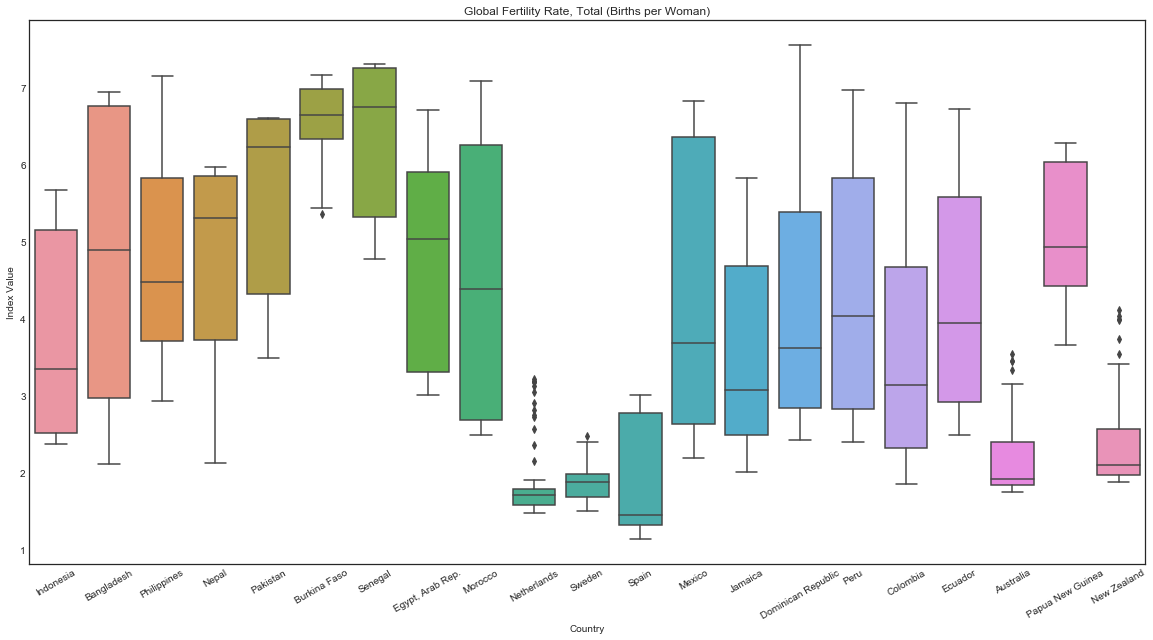

In [21]:
# global fertility rate, total (births, per woman)

sns.boxplot(x='Country', y='Index_Value', data=world[world.Indicator_Code=='SP.DYN.TFRT.IN'])
plt.xticks(rotation=30)
plt.title('Global Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value');

## Which country has the highest average fertility rate?  

Based on the boxplot, Senegal appears to have the highest average fertility rate.  A closer look at a bar graph and statistics for Senegal's fertility rate confirms that Senegal does have the highest fertility rate of the selected countries.  

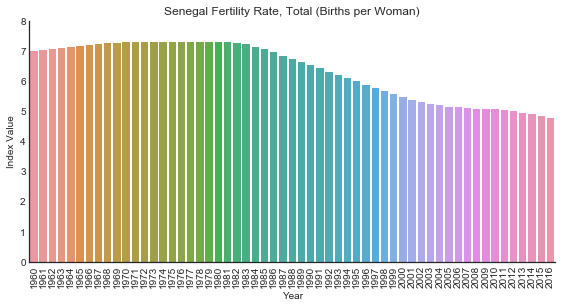

In [22]:
# Senegal fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=sen.loc[(sen.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Senegal Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

In [23]:
sen.loc[(sen.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,6.36
std,0.94
min,4.77
25%,5.31
50%,6.74
75%,7.26
max,7.31


## Which country has the most stable fertility rate?  

Senegal's small standard deviation indicates a small spread in variance between total births per year.  However, Spain has the most stable fertility rate, in conjunction with the lowest fertility rate among the countries selected.  Spain's standard deviation of 0.71 indicates it has less variance in births than Senegal.

In [24]:
spain.loc[(spain.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,1.90
std,0.71
min,1.13
25%,1.32
50%,1.45
75%,2.77
max,3.01


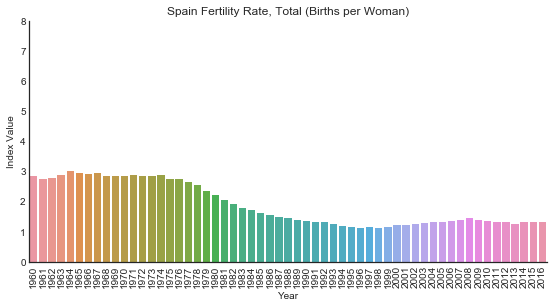

In [25]:
# Spain fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=spain.loc[(spain.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Spain Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

## Supervised Learning Model Selection and Evaluation:  

Several supervised models were tested and evaluated based on accuracy and recall.  Accuracy is (define).  Recall is defined as the ratio of tp/(tp + fn) where tp is the number of true positives and fn the number of false negatives.  The recall is the intuitive ability of the classifier to find and correctly classify all the true positive samples.  

The supervised models evaluated and tested include random forest classifier, support vector machine classifier, XGBoost classifier and CatBoost Classifier.  Feature importance was calculated for both random forest and XGBoost.

In [26]:
# get dummies for North America

features = pd.get_dummies(world[['Country_Code', 'Indicator_Code', 'Year', 'Index_Value']])

In [27]:
features.shape

(264811, 463)

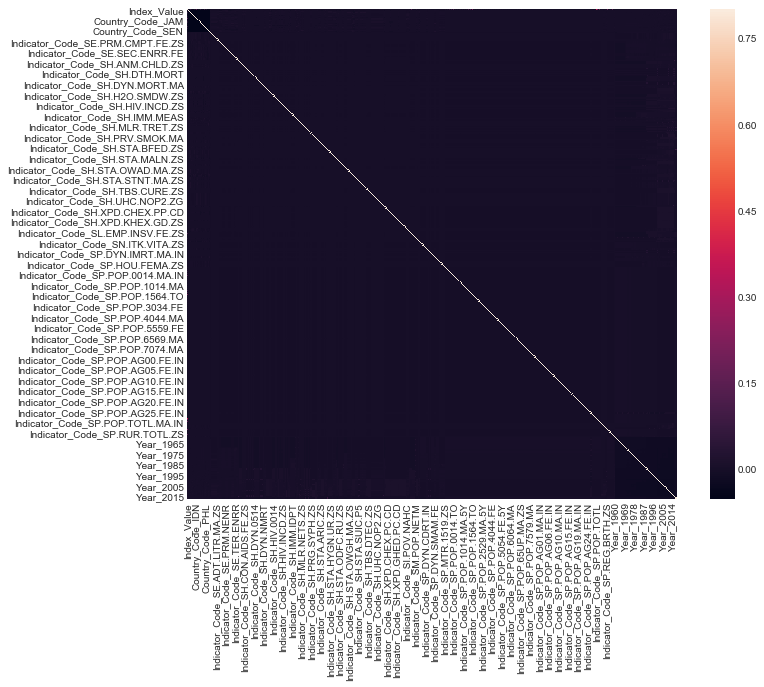

In [28]:
# index value is the only numeric column

corrmat = features.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [29]:
features.corr()

,Index_Value,Country_Code_AUS,Country_Code_BFA,Country_Code_BGD,Country_Code_COL,Country_Code_DOM,Country_Code_ECU,Country_Code_EGY,Country_Code_ESP,Country_Code_IDN,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
Index_Value,1.00,-0.02,-0.03,0.06,-0.01,-0.03,-0.03,0.02,-0.00,0.13,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.02
Country_Code_AUS,-0.02,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
Country_Code_BFA,-0.03,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
Country_Code_BGD,0.06,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
Country_Code_COL,-0.01,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,...,0.00,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
Country_Code_DOM,-0.03,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,...,-0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.00,-0.00
Country_Code_ECU,-0.03,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,...,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Code_EGY,0.02,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
Country_Code_ESP,-0.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
Country_Code_IDN,0.13,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00


In [30]:
from sklearn.model_selection import train_test_split

X = features.drop(['Indicator_Code_SP.DYN.TFRT.IN'], 1)
y = features[('Indicator_Code_SP.DYN.TFRT.IN')]

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

In [31]:
# random forest classifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.99471366,  0.99534298,  0.99521712,  0.99496539,  0.99546885,
        0.99546885,  0.99521712,  0.99521591,  0.99546771,  0.99521591])

**The cross validation scores suggest overfitting, so checking recall might be a more accurate indicator of model performance.**

In [33]:
from sklearn.metrics import recall_score

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.479


**47.9% recall is low for a model with cross validation scores at 99%.  Feature engineering will be performed in an attempt to increase recall.**  

In [34]:
# support vector machine classifier

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
# svc cross validation

cross_val_score(svc, X_test, y_test, cv=5)

array([ 0.99546885,  0.99546885,  0.99553122,  0.99553122,  0.99553122])

In [35]:
# svc recall score

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


**A recall score of 0 indicates that this model is not effective at all for correctly classifying true posititves in this dataset.**

In [37]:
# xgboost classifier

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 0.99546885,  0.99546885,  0.99546885,  0.99546885,  0.99546885,
        0.99546885,  0.99546885,  0.9955936 ,  0.9955936 ,  0.9955936 ])

In [39]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_pred, y_test))

	Recall: 0.000


/Users/jamilab/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


**While the cross validation scores are consistent, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

In [47]:
# catboost classifier

from catboost import CatBoostClassifier, FeaturesData

# Initialize CatBoostClassifier

cbc = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
y_pred = cbc.predict(X_test)#, prediction_type='RawFormulaVal')

# Get predicted probabilities for each class
preds_proba = cbc.predict_proba(X_test)

0:	learn: 0.0203428	total: 215ms	remaining: 215ms
1:	learn: 0.0200386	total: 451ms	remaining: 0us


In [41]:
# catboost cross validation

cross_val_score(cbc, X_test, y_test, cv=10)

0:	learn: 0.0202576	total: 85.4ms	remaining: 85.4ms
1:	learn: 0.0199386	total: 173ms	remaining: 0us
0:	learn: 0.0201848	total: 84.6ms	remaining: 84.6ms
1:	learn: 0.0197447	total: 172ms	remaining: 0us
0:	learn: 0.0201936	total: 84.9ms	remaining: 84.9ms
1:	learn: 0.0199008	total: 172ms	remaining: 0us
0:	learn: 0.0201459	total: 84.2ms	remaining: 84.2ms
1:	learn: 0.0198469	total: 172ms	remaining: 0us
0:	learn: 0.0198585	total: 82.7ms	remaining: 82.7ms
1:	learn: 0.0195692	total: 171ms	remaining: 0us
0:	learn: 0.0206655	total: 84.4ms	remaining: 84.4ms
1:	learn: 0.0203500	total: 172ms	remaining: 0us
0:	learn: 0.0197607	total: 85.3ms	remaining: 85.3ms
1:	learn: 0.0194621	total: 172ms	remaining: 0us
0:	learn: 0.0206068	total: 84ms	remaining: 84ms
1:	learn: 0.0202906	total: 172ms	remaining: 0us
0:	learn: 0.0199002	total: 84.2ms	remaining: 84.2ms
1:	learn: 0.0196023	total: 172ms	remaining: 0us
0:	learn: 0.0197514	total: 83.2ms	remaining: 83.2ms
1:	learn: 0.0194607	total: 171ms	remaining: 0us


array([ 0.99584644,  0.99572058,  0.99584644,  0.99572058,  0.99496475,
        0.99710473,  0.99408359,  0.99622356,  0.99471299,  0.99483887])

In [48]:
# catboost recall score

print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


## What are the most significant features influencing fertility rates?  

The xgboost classifier identifies index value, country code ESP, and the percentage of the female population aged 50-54.

Feature ranking:
1. feature 0 (0.292986)
2. feature 282 (0.014743)
3. feature 8 (0.011541)
4. feature 13 (0.011123)
5. feature 286 (0.010380)
6. feature 314 (0.010071)
7. feature 316 (0.010066)
8. feature 21 (0.009904)
9. feature 2 (0.009640)
10. feature 292 (0.008845)
11. feature 15 (0.008800)
12. feature 1 (0.008359)
13. feature 328 (0.008044)
14. feature 298 (0.007975)
15. feature 20 (0.007739)
16. feature 280 (0.007665)
17. feature 3 (0.007369)
18. feature 276 (0.007207)
19. feature 10 (0.007020)
20. feature 105 (0.006861)
21. feature 47 (0.006859)
22. feature 4 (0.006785)
23. feature 19 (0.006616)
24. feature 308 (0.006416)
25. feature 16 (0.006392)
26. feature 310 (0.006007)
27. feature 312 (0.005958)
28. feature 18 (0.005709)
29. feature 385 (0.005685)
30. feature 14 (0.005655)
31. feature 318 (0.005631)
32. feature 12 (0.005601)
33. feature 304 (0.005220)
34. feature 7 (0.005124)
35. feature 17 (0.005049)
36. feature 284 (0.004973)
37. feature 383 (0.004936)
38. feature 296 (0.

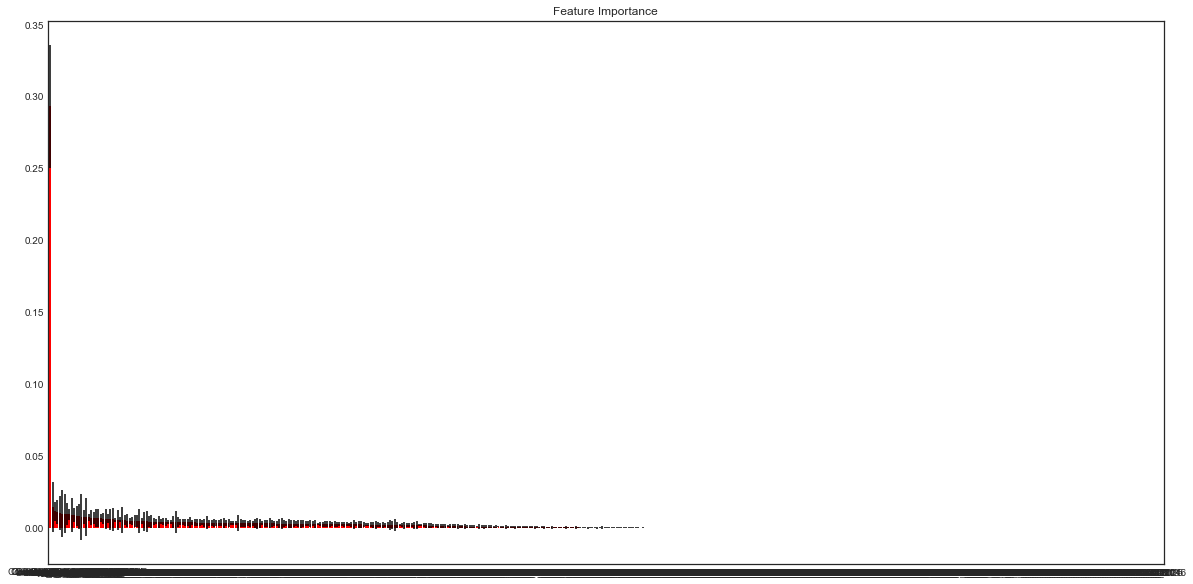

In [49]:
# calculate & plot feature importance for random forest classifier

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

df = pd.DataFrame(importances)

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = features.columns # e.g. ['A', 'B', 'C', 'D', 'E']
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [50]:
df[0].sort_values(ascending=False)

0     0.29
282   0.01
8     0.01
13    0.01
286   0.01
314   0.01
316   0.01
21    0.01
2     0.01
292   0.01
15    0.01
1     0.01
328   0.01
298   0.01
20    0.01
280   0.01
3     0.01
276   0.01
10    0.01
105   0.01
47    0.01
4     0.01
19    0.01
308   0.01
16    0.01
310   0.01
312   0.01
18    0.01
385   0.01
14    0.01
      ... 
73    0.00
207   0.00
53    0.00
195   0.00
79    0.00
155   0.00
93    0.00
74    0.00
64    0.00
156   0.00
394   0.00
393   0.00
392   0.00
115   0.00
391   0.00
147   0.00
56    0.00
92    0.00
55    0.00
54    0.00
78    0.00
182   0.00
208   0.00
123   0.00
184   0.00
186   0.00
189   0.00
28    0.00
126   0.00
125   0.00
Name: 0, Length: 462, dtype: float64

In [51]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [52]:
df.head()

,0
0,0.29
1,0.01
2,0.01
3,0.01
4,0.01


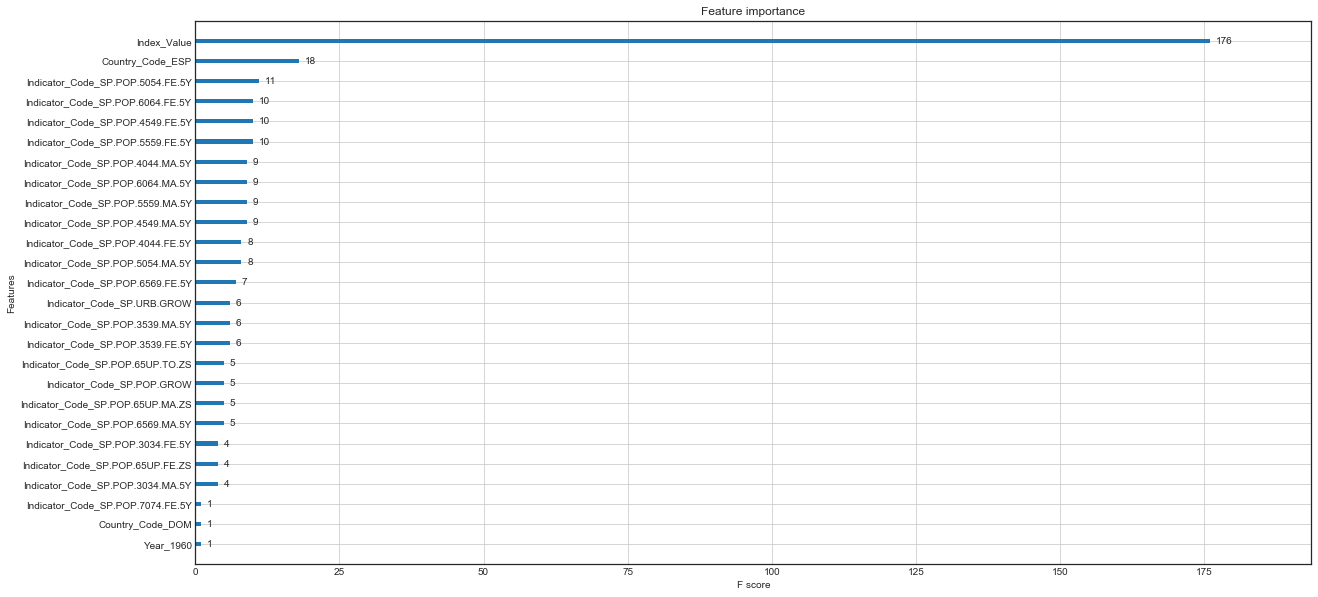

In [53]:
# xgboost classifier

from xgboost import plot_importance

plot_importance(xgb)
plt.show()

In [54]:
# get indicator name

world.loc[(world.Indicator_Code == 'SP.POP.5054.FE.5Y')].head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
9566,Indonesia,IDN,"Population ages 50-54, female (% of female pop...",SP.POP.5054.FE.5Y,1960,3.54
9567,Indonesia,IDN,"Population ages 50-54, female (% of female pop...",SP.POP.5054.FE.5Y,1961,3.53
9568,Indonesia,IDN,"Population ages 50-54, female (% of female pop...",SP.POP.5054.FE.5Y,1962,3.52
9569,Indonesia,IDN,"Population ages 50-54, female (% of female pop...",SP.POP.5054.FE.5Y,1963,3.50
9570,Indonesia,IDN,"Population ages 50-54, female (% of female pop...",SP.POP.5054.FE.5Y,1964,3.48


In [55]:
# delete variables; models perform better

del X_train
del X_test
del y_pred
del rfc
del svc
del xgb
del cbc

## Dimensionality Reduction via Principal Components Analysis (PCA)

In [56]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
pca.components_

array([[  1.00000000e+00,  -6.04642313e-10,  -8.56888217e-10,
          1.91499474e-09,  -1.84915164e-10,  -9.21464636e-10,
         -8.33996165e-10,   5.08702303e-10,  -1.94113269e-11,
          3.97861247e-09,  -1.06149391e-09,  -4.50009254e-10,
          1.27805025e-09,  -7.01885394e-10,  -5.70147447e-10,
         -9.63465893e-10,   2.06718539e-09,  -5.40723796e-10,
          6.92923023e-10,  -9.44049466e-10,  -9.11068324e-10,
         -8.76306868e-10,  -1.00396351e-10,  -1.27335618e-11,
         -1.27326690e-11,  -1.27326951e-11,  -1.27328373e-11,
         -1.27327384e-11,  -1.27327874e-11,  -2.33149738e-12,
         -4.31300796e-11,  -4.31299724e-11,  -4.87790854e-11,
         -8.06098138e-11,  -7.60371556e-11,  -7.60366528e-11,
         -5.62210966e-11,  -4.50128858e-11,  -4.50127445e-11,
         -7.27211688e-11,  -6.52786566e-11,  -6.52785284e-11,
         -3.29979329e-11,  -3.09355199e-11,  -3.09355432e-11,
         -6.54601038e-11,  -5.31750380e-11,  -4.57330965e-11,
        

In [58]:
pca.transform(X)

array([[ -1.22288464e+06,  -2.52920372e-01],
       [ -1.22287634e+06,  -2.50364824e-01],
       [ -1.22287404e+06,  -2.46365009e-01],
       ..., 
       [ -1.22288351e+06,   9.28763226e-02],
       [ -1.22288329e+06,   9.47155129e-02],
       [ -1.22288326e+06,   9.45064882e-02]])

In [59]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([  1.00000000e+00,   9.45279744e-16])

In [60]:
X_pca = pca.transform(X)

## K-Means Clustering

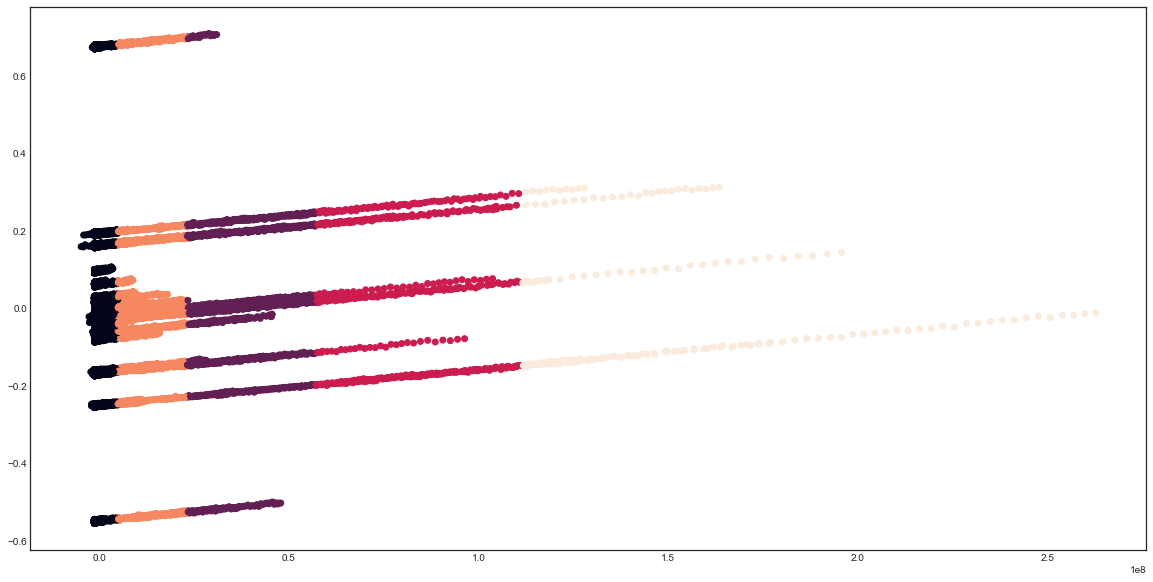

Comparing k-means clusters against the data:
Indicator_Code_SP.DYN.TFRT.IN       0     1
row_0                                      
0                              254357  1197
1                                2047     0
2                                 729     0
3                                6253     0
4                                 228     0


In [61]:
# k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, y))

**While the clusters have good separation without overlap, their shape is not the typical spherical shape possibly due to the data being categorical.**

## Model Evaluation After PCA

In [62]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.3,
    random_state=42)

In [63]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.99509125,  0.99458779,  0.99597231,  0.99471366,  0.99584644,
        0.99408433,  0.99446193,  0.99521591,  0.99446053,  0.99509002])

In [64]:
# rfc recall score

y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.154


**While the cross validation scores remain consistent, recall dropped significantly.  Dimensionality reduction lead to reduction in classification accuracy based on the recall score.**

In [65]:
# gradient boost classifier

# We'll make 500 iterations, use 2-deep trees, and set loss function

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [66]:
# gradient boost classifier cross validation

cross_val_score(clf, X_test, y_test, cv=10)

array([ 0.99534298,  0.99546885,  0.99546885,  0.99559471,  0.99534298,
        0.99534298,  0.99534298,  0.9955936 ,  0.9955936 ,  0.9955936 ])

In [67]:
# gradient boost recall score

print("\tRecall: %1.3f" % recall_score(y_test, predict_test))

	Recall: 0.006


**The cross validation scores are stable, however, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

In [68]:
# xgboost classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [69]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 0.99546885,  0.99546885,  0.99546885,  0.99546885,  0.99546885,
        0.99546885,  0.99546885,  0.9955936 ,  0.9955936 ,  0.9955936 ])

In [72]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


**The cross validation scores are stable, however, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

In [73]:
# catboost classifier
# Initialize CatBoostClassifier

cbc = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
y_pred = cbc.predict(X_test)

# Get predicted probabilities for each class
preds_proba = cbc.predict_proba(X_test)

0:	learn: 0.0203542	total: 24.3ms	remaining: 24.3ms
1:	learn: 0.0202942	total: 59ms	remaining: 0us


In [74]:
# catboost cross validation

cross_val_score(cbc, X_test, y_test, cv=10)

0:	learn: 0.0202215	total: 10.7ms	remaining: 10.7ms
1:	learn: 0.0201278	total: 23.7ms	remaining: 0us
0:	learn: 0.0201555	total: 17.5ms	remaining: 17.5ms
1:	learn: 0.0199867	total: 34.9ms	remaining: 0us
0:	learn: 0.0202180	total: 10.9ms	remaining: 10.9ms
1:	learn: 0.0199562	total: 23.3ms	remaining: 0us
0:	learn: 0.0201845	total: 12.1ms	remaining: 12.1ms
1:	learn: 0.0201145	total: 24.3ms	remaining: 0us
0:	learn: 0.0198975	total: 12.2ms	remaining: 12.2ms
1:	learn: 0.0197034	total: 23.7ms	remaining: 0us
0:	learn: 0.0207316	total: 12.2ms	remaining: 12.2ms
1:	learn: 0.0205369	total: 24.1ms	remaining: 0us
0:	learn: 0.0195411	total: 10.9ms	remaining: 10.9ms
1:	learn: 0.0193000	total: 21.3ms	remaining: 0us
0:	learn: 0.0204073	total: 10.9ms	remaining: 10.9ms
1:	learn: 0.0203346	total: 20.7ms	remaining: 0us
0:	learn: 0.0197668	total: 11ms	remaining: 11ms
1:	learn: 0.0196670	total: 22.5ms	remaining: 0us
0:	learn: 0.0199135	total: 12ms	remaining: 12ms
1:	learn: 0.0197773	total: 22.3ms	remaining: 0u

array([ 0.99584644,  0.99572058,  0.99584644,  0.99572058,  0.99496475,
        0.99710473,  0.99408359,  0.99622356,  0.99471299,  0.99483887])

In [75]:
# catboost recall score

print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


**The cross validation scores are stable, however, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

In [76]:
# delete variables; models perform better

del X_train
del X_test
del y_pred
del rfc
del xgb
del cbc

## Conclusions  

Model performance as evaluated by recall score was better before performing dimensionality reduction via PCA.  Based on the recall scores, too much data is being lost leading do decreased prediction accuracy.  Different methods of feature engineering might have a better impact on precision accuracy as measured by recall score.  This would have to be evaluated in the future, and using more data from the dataset would likely be beneficail as well.  

# United States Comparison Analysis

## How does the fertility rate of the US compare to the 21 selected countries?  

The United States has a low fertility rate, and falls in the category of countries with fertility rates of less than 3 births per woman.

In [77]:
# create df of US data

us = pd.DataFrame(stats[stats.Country=='United States'])

In [78]:
# combine individual country dataframes & set column names

df = pd.concat([us, world], axis=0, ignore_index=True)
stats.columns = df.columns

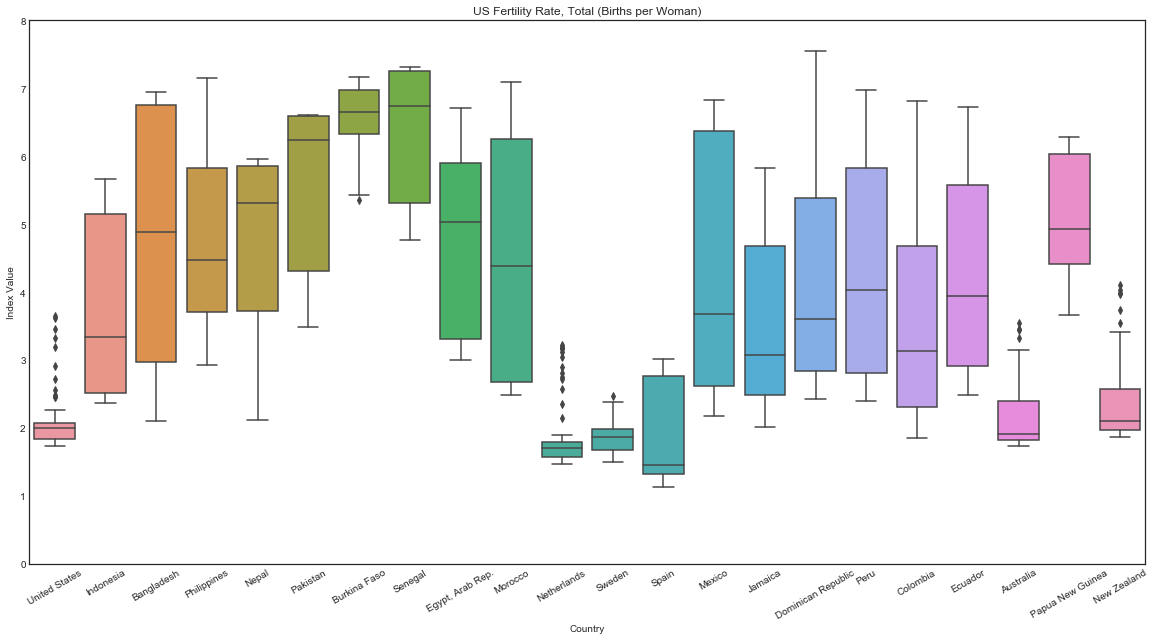

In [79]:
# global fertility rate, total (births, per woman)

sns.boxplot(x='Country', y='Index_Value', data=df[df.Indicator_Code=='SP.DYN.TFRT.IN'])
plt.xticks(rotation=30)
plt.title('US Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

## How stable is the United States' fertility rate?

The United States has a very stable fertility rate with a standard deviation of 0.47.  The US has less variance in number of births than Spain, which makes it's fertility rate more consistent than Spain's fertility rate.

In [80]:
us.loc[(us.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,2.14
std,0.47
min,1.74
25%,1.84
50%,2.00
75%,2.08
max,3.65


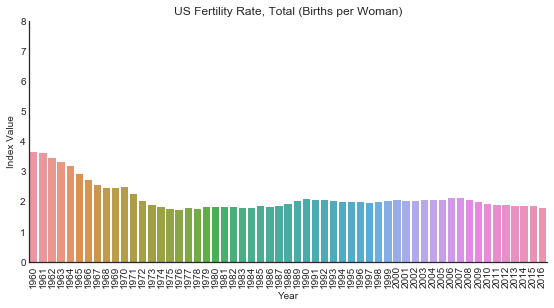

In [81]:
# US fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

## Supervised Learning Model Selection and Evaluation:  

Several supervised models were tested and evaluated based on accuracy and recall.  Accuracy is (define).  Recall is defined as the ratio of tp/(tp + fn) where tp is the number of true positives and fn the number of false negatives.  The recall is the intuitive ability of the classifier to find and correctly classify all the true positive samples.  

The supervised models evaluated and tested include random forest classifier, support vector machine classifier, XGBoost classifier and CatBoost Classifier.  Feature importance was calculated for both random forest and XGBoost.

In [82]:
# get dummies for the US

features_us = pd.get_dummies(us[['Country_Code', 'Indicator_Code', 'Year', 'Index_Value']])

In [83]:
features_us.shape

(12165, 374)

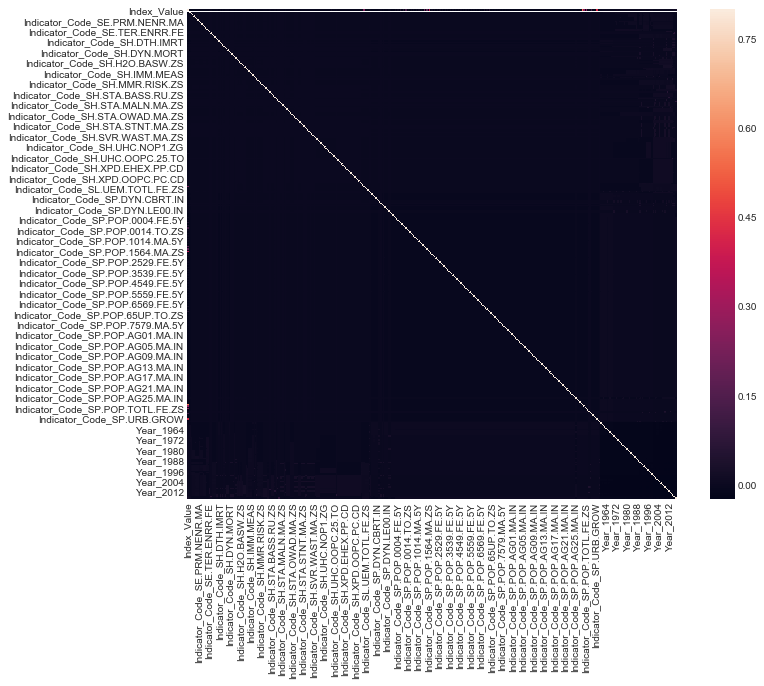

In [84]:
# index value is the only numeric column

corrmat = features_us.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [85]:
features_us.corr()

,Index_Value,Country_Code_USA,Indicator_Code_NY.GNP.PCAP.CD,Indicator_Code_SE.PRM.ENRR,Indicator_Code_SE.PRM.ENRR.FE,Indicator_Code_SE.PRM.ENRR.MA,Indicator_Code_SE.PRM.NENR,Indicator_Code_SE.PRM.NENR.FE,Indicator_Code_SE.PRM.NENR.MA,Indicator_Code_SE.SEC.ENRR,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
Index_Value,1.00,nan,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,...,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,0.02
Country_Code_USA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Indicator_Code_NY.GNP.PCAP.CD,-0.02,nan,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
Indicator_Code_SE.PRM.ENRR,-0.02,nan,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01
Indicator_Code_SE.PRM.ENRR.FE,-0.01,nan,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01
Indicator_Code_SE.PRM.ENRR.MA,-0.01,nan,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01
Indicator_Code_SE.PRM.NENR,-0.01,nan,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,...,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.01,-0.01,-0.01
Indicator_Code_SE.PRM.NENR.FE,-0.01,nan,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,...,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,-0.01,-0.01
Indicator_Code_SE.PRM.NENR.MA,-0.01,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,...,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,-0.01,-0.01
Indicator_Code_SE.SEC.ENRR,-0.02,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01


In [86]:
from sklearn.model_selection import train_test_split

X = features_us.drop(['Indicator_Code_SP.DYN.TFRT.IN'], 1)

y = features_us[('Indicator_Code_SP.DYN.TFRT.IN')]

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

In [87]:
# random forest classifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.98360656,  0.99178082,  0.99178082,  0.99452055,  0.9890411 ,
        0.99178082,  0.99452055,  0.99452055,  0.99452055,  0.99450549])

**Similar to the world data, the cross validation scores suggest overfitting.**

In [91]:
# random forest classifier recall score

#rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.095


**9.5% recall is extremely low for a model with cross validation scores at 99%.  Feature engineering will be performed in an attempt to increase recall.**  

In [92]:
# support vector machine classifier

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
# svc cross validation

cross_val_score(svc, X_test, y_test, cv=5)

array([ 0.99316005,  0.99452055,  0.99452055,  0.99452055,  0.99451303])

In [95]:
# svc recall score

y_pred = svc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


**The cross validation scores are stable, however, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

In [97]:
# xgboost classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [98]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 1.        ,  1.        ,  0.99178082,  0.99726027,  0.9890411 ,
        0.9890411 ,  0.99452055,  1.        ,  1.        ,  0.99725275])

In [99]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_pred, y_test))

	Recall: 1.000


**High cross validation scores and a recall of 1 definitely suggests overfitting and the likelihood that there may not be enough variance in the data to make proper predictions.**

In [105]:
# catboost classifier
# Initialize CatBoostClassifier

cbc = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
y_pred = cbc.predict(X_test)#, prediction_type='RawFormulaVal')

# Get predicted probabilities for each class
preds_proba = cbc.predict_proba(X_test)

0:	learn: 0.0273860	total: 30.2ms	remaining: 30.2ms
1:	learn: 0.0151094	total: 59.4ms	remaining: 0us


In [106]:
# catboost cross validation

cross_val_score(cbc, X_test, y_test, cv=10)

0:	learn: 0.0357504	total: 15.8ms	remaining: 15.8ms
1:	learn: 0.0186050	total: 31.4ms	remaining: 0us
0:	learn: 0.0373210	total: 16.6ms	remaining: 16.6ms
1:	learn: 0.0187979	total: 32.6ms	remaining: 0us
0:	learn: 0.0373141	total: 22ms	remaining: 22ms
1:	learn: 0.0183000	total: 36.2ms	remaining: 0us
0:	learn: 0.0341760	total: 17.1ms	remaining: 17.1ms
1:	learn: 0.0180898	total: 31.7ms	remaining: 0us
0:	learn: 0.0357556	total: 20ms	remaining: 20ms
1:	learn: 0.0206424	total: 36.6ms	remaining: 0us
0:	learn: 0.0293484	total: 15.5ms	remaining: 15.5ms
1:	learn: 0.0135406	total: 31.9ms	remaining: 0us
0:	learn: 0.0325981	total: 16.5ms	remaining: 16.5ms
1:	learn: 0.0167193	total: 32.4ms	remaining: 0us
0:	learn: 0.0388578	total: 15.3ms	remaining: 15.3ms
1:	learn: 0.0205882	total: 30.7ms	remaining: 0us
0:	learn: 0.0388530	total: 18.6ms	remaining: 18.6ms
1:	learn: 0.0182626	total: 35.3ms	remaining: 0us
0:	learn: 0.0357548	total: 16.2ms	remaining: 16.2ms
1:	learn: 0.0177138	total: 30ms	remaining: 0us


array([ 0.99452055,  1.        ,  0.99726027,  0.99178082,  0.99452055,
        0.98356164,  0.9890411 ,  1.        ,  1.        ,  0.99452055])

In [110]:
# catboost recall score

y_pred = cbc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


**Although the cross validation scores are stable, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

## What are the most significant features affecting fertility rates?  

Plotting feature importance for the random forest classifier yields index value and country code USA as the most significant features affecting fertility rates.

Based on the feature importance of the xgboost classification model, the 3 most significant features affecting fertility rates are index value, the percentage of the male population aged 75-79 and 80 and up.

Feature ranking:
1. feature 0 (0.585494)
2. feature 239 (0.039535)
3. feature 243 (0.038843)
4. feature 52 (0.030069)
5. feature 311 (0.015936)
6. feature 241 (0.014195)
7. feature 300 (0.011699)
8. feature 348 (0.010989)
9. feature 235 (0.010575)
10. feature 237 (0.009556)
11. feature 309 (0.009118)
12. feature 349 (0.008631)
13. feature 233 (0.008195)
14. feature 329 (0.008100)
15. feature 350 (0.007397)
16. feature 346 (0.007275)
17. feature 351 (0.006063)
18. feature 340 (0.005908)
19. feature 334 (0.005906)
20. feature 367 (0.005464)
21. feature 347 (0.005208)
22. feature 296 (0.005090)
23. feature 358 (0.004976)
24. feature 368 (0.004844)
25. feature 318 (0.004792)
26. feature 225 (0.004413)
27. feature 343 (0.004349)
28. feature 223 (0.004089)
29. feature 87 (0.003869)
30. feature 324 (0.003817)
31. feature 370 (0.003637)
32. feature 330 (0.003473)
33. feature 104 (0.003414)
34. feature 328 (0.003337)
35. feature 140 (0.003276)
36. feature 118 (0.003185)
37. feature 344 (0.00313

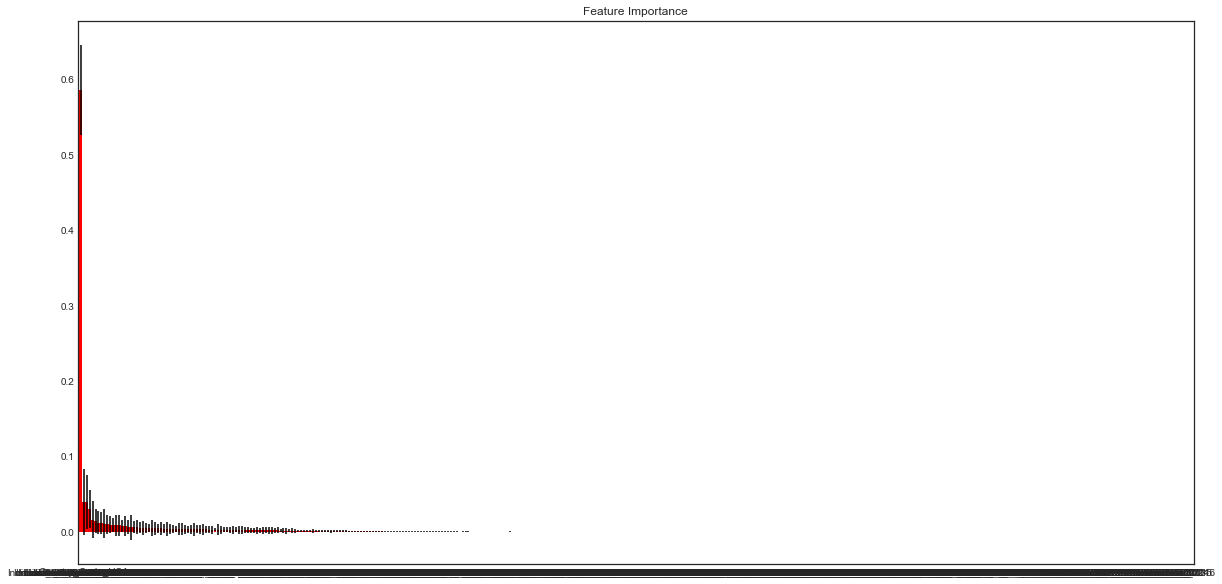

In [112]:
# calculate & plot feature importance

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

df_us = pd.DataFrame(importances)

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = features_us.columns # e.g. ['A', 'B', 'C', 'D', 'E']
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [113]:
df_us[0].sort_values(ascending=False)

0     0.59
239   0.04
243   0.04
52    0.03
311   0.02
241   0.01
300   0.01
348   0.01
235   0.01
237   0.01
309   0.01
349   0.01
233   0.01
329   0.01
350   0.01
346   0.01
351   0.01
340   0.01
334   0.01
367   0.01
347   0.01
296   0.01
358   0.00
368   0.00
318   0.00
225   0.00
343   0.00
223   0.00
87    0.00
324   0.00
      ... 
90    0.00
91    0.00
96    0.00
99    0.00
70    0.00
69    0.00
67    0.00
66    0.00
65    0.00
110   0.00
63    0.00
116   0.00
60    0.00
58    0.00
34    0.00
117   0.00
53    0.00
121   0.00
51    0.00
49    0.00
125   0.00
127   0.00
43    0.00
40    0.00
39    0.00
38    0.00
37    0.00
131   0.00
35    0.00
114   0.00
Name: 0, Length: 373, dtype: float64

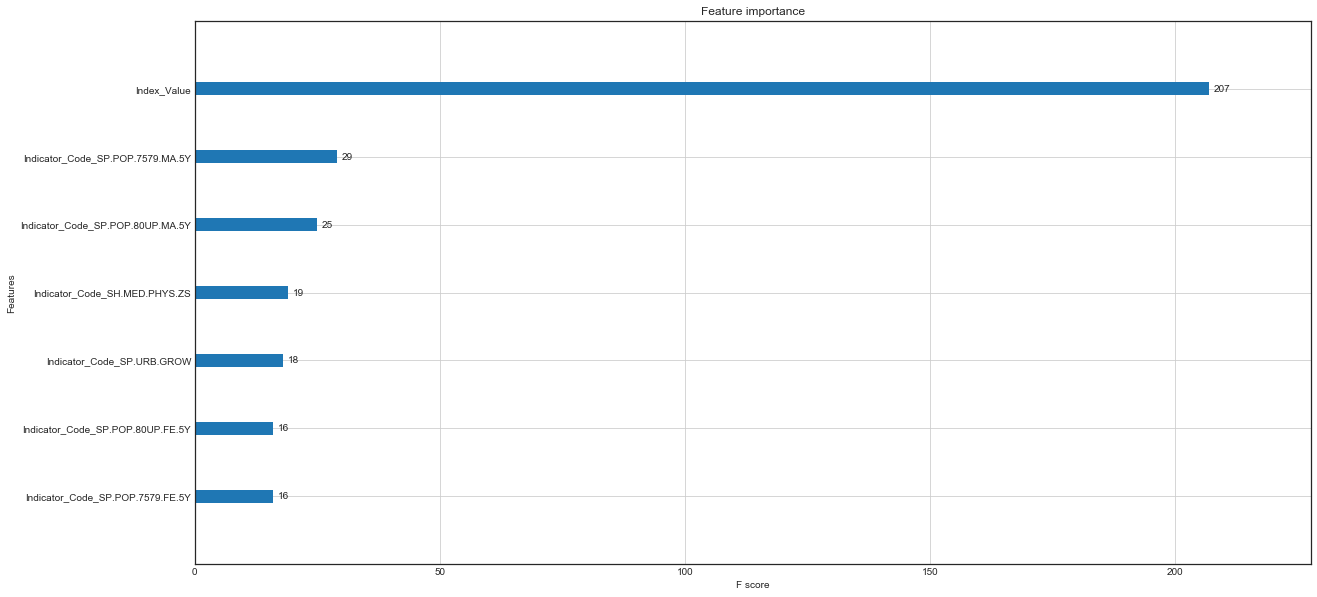

In [114]:
# xgboost classifier feature importance

plot_importance(xgb)
plt.show()

In [115]:
# get indicator name

us.loc[(us.Indicator_Code == 'SP.POP.7579.MA.5Y')].head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
2599384,United States,USA,"Population ages 75-79, male (% of male populat...",SP.POP.7579.MA.5Y,1960,1.51
2599385,United States,USA,"Population ages 75-79, male (% of male populat...",SP.POP.7579.MA.5Y,1961,1.52
2599386,United States,USA,"Population ages 75-79, male (% of male populat...",SP.POP.7579.MA.5Y,1962,1.52
2599387,United States,USA,"Population ages 75-79, male (% of male populat...",SP.POP.7579.MA.5Y,1963,1.53
2599388,United States,USA,"Population ages 75-79, male (% of male populat...",SP.POP.7579.MA.5Y,1964,1.56


In [116]:
# get indicator name

us.loc[(us.Indicator_Code == 'SP.POP.80UP.MA.5Y')].head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
2599500,United States,USA,"Population ages 80 and older, male (% of male ...",SP.POP.80UP.MA.5Y,1960,1.14
2599501,United States,USA,"Population ages 80 and older, male (% of male ...",SP.POP.80UP.MA.5Y,1961,1.20
2599502,United States,USA,"Population ages 80 and older, male (% of male ...",SP.POP.80UP.MA.5Y,1962,1.23
2599503,United States,USA,"Population ages 80 and older, male (% of male ...",SP.POP.80UP.MA.5Y,1963,1.25
2599504,United States,USA,"Population ages 80 and older, male (% of male ...",SP.POP.80UP.MA.5Y,1964,1.24


In [117]:
# delete variables; models perform better

del X_train
del X_test
del y_pred
del rfc
del xgb
del X_pca
del cbc

## Dimensionality Reduction via Principal Components Analysis (PCA)

In [118]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [119]:
pca.components_

array([[  1.00000000e+00,  -0.00000000e+00,  -4.12780200e-11,
         -3.03183670e-11,  -2.29236366e-11,  -2.29236367e-11,
         -1.92262921e-11,  -1.84868173e-11,  -1.84868191e-11,
         -2.95789161e-11,  -2.36631287e-11,  -2.36631283e-11,
         -1.62684121e-11,  -1.55289369e-11,  -1.55289404e-11,
         -1.99658449e-11,  -1.92263635e-11,  -3.69740457e-12,
         -7.39480487e-13,  -1.99659737e-11,  -1.99659790e-11,
         -1.99659741e-11,  -3.69444309e-12,  -2.95792352e-12,
         -4.19085733e-11,  -2.95792324e-12,  -4.18654240e-11,
         -2.95789311e-12,  -3.53838257e-11,  -3.69740619e-12,
         -4.51072967e-12,  -5.17636939e-12,  -4.21503635e-11,
         -3.69740363e-12,  -3.69740288e-12,  -3.69739982e-12,
         -3.62345563e-11,  -5.17631506e-12,  -8.13419749e-12,
         -1.18315554e-11,  -8.13419497e-12,  -1.18315556e-11,
         -8.13419515e-12,  -5.14998315e-12,  -5.17636970e-12,
         -1.77473672e-11,  -1.62684036e-11,  -2.73604897e-11,
        

In [120]:
pca.transform(X)

array([[ -8.04307209e+06,   7.26716776e-03],
       [ -8.04307465e+06,   4.87070056e-03],
       [ -8.04307721e+06,  -5.82015255e-04],
       ..., 
       [ -8.04315288e+06,   1.73531703e-02],
       [ -8.04315290e+06,   1.83388427e-02],
       [ -8.04315292e+06,   5.93223991e-03]])

In [121]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([  1.00000000e+00,   2.59646302e-17])

In [122]:
X_pca = pca.transform(X)

## K-Means Clustering

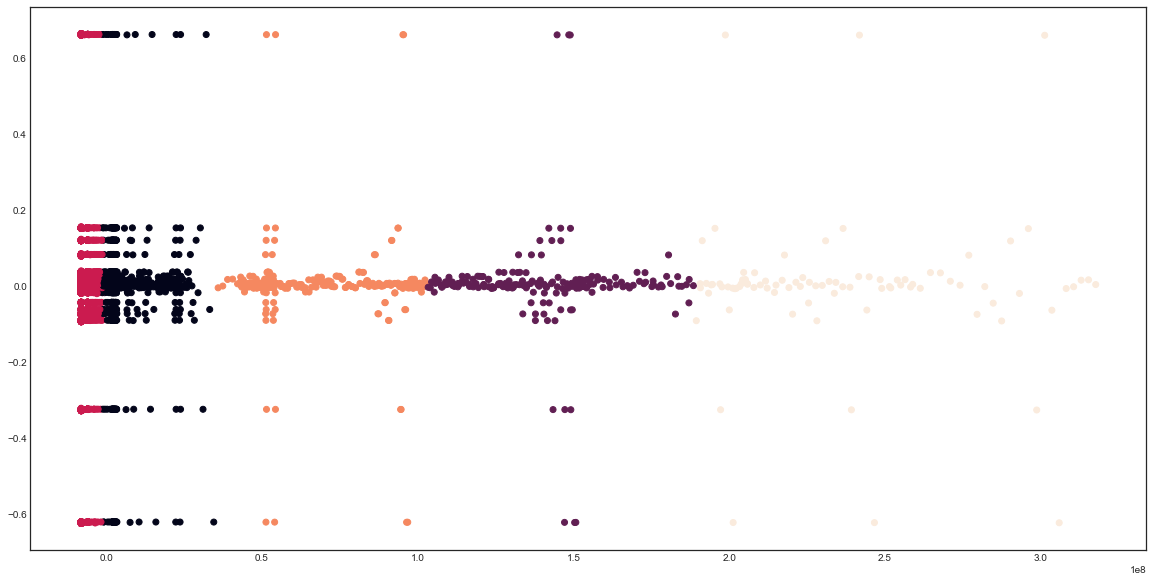

Comparing k-means clusters against the data:
Indicator_Code_SP.DYN.TFRT.IN      0   1
row_0                                   
0                               1371   0
1                                190   0
2                              10182  57
3                                276   0
4                                 89   0


In [123]:
# k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, y))

**The clusters have good separation without overlap, however, the cluster shape is atypical likely due to the data being categorical.**

## Model Evaluation After PCA

In [125]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.3,
    random_state=42)

In [126]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.9863388 ,  0.9890411 ,  0.99452055,  0.99452055,  0.99726027,
        0.99178082,  0.99178082,  0.99452055,  0.99452055,  0.99450549])

In [127]:
# rfc recall score

y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.143


**Similar to the world data, the cross validation scores remained consistent although recall dropped significantly.  Dimensionality reduction lead to decrease in classification accuracy based on the recall score.**

In [128]:
# gradient boost classifier

# We'll make 500 iterations, use 2-deep trees, and set loss function
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [129]:
# gradient boost classifier cross validation

cross_val_score(clf, X_test, y_test, cv=10)

array([ 0.9863388 ,  0.99726027,  0.99726027,  0.99452055,  0.99178082,
        0.9890411 ,  0.99178082,  0.99178082,  0.99726027,  0.99725275])

In [130]:
y_pred = clf.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.143


**The cross validation scores are stable, however, the recall is extremely low, which suggests there may not be enough variance in the data to make proper predictions.**

In [131]:
# xgboost classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [132]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 0.99180328,  0.99452055,  0.99452055,  0.99452055,  0.99452055,
        0.99452055,  0.99452055,  0.99452055,  0.99452055,  0.99450549])

In [134]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


**The cross validation scores are stable, however, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

In [135]:
# catboost classifier
# Initialize CatBoostClassifier

cbc = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
preds_class = cbc.predict(X_test, prediction_type='RawFormulaVal')

# Get predicted probabilities for each class
preds_proba = cbc.predict_proba(X_test)

0:	learn: 0.0222748	total: 41.9ms	remaining: 41.9ms
1:	learn: 0.0149763	total: 86ms	remaining: 0us


In [136]:
# catboost cross validation

cross_val_score(cbc, X_test, y_test, cv=10)

0:	learn: 0.0353772	total: 30.3ms	remaining: 30.3ms
1:	learn: 0.0198924	total: 61.2ms	remaining: 0us
0:	learn: 0.0369964	total: 32.8ms	remaining: 32.8ms
1:	learn: 0.0203263	total: 47.8ms	remaining: 0us
0:	learn: 0.0368112	total: 9.26ms	remaining: 9.26ms
1:	learn: 0.0191508	total: 19.6ms	remaining: 0us
0:	learn: 0.0315405	total: 9.36ms	remaining: 9.36ms
1:	learn: 0.0179596	total: 19.9ms	remaining: 0us
0:	learn: 0.0335895	total: 12.1ms	remaining: 12.1ms
1:	learn: 0.0181303	total: 22.3ms	remaining: 0us
0:	learn: 0.0289502	total: 10.5ms	remaining: 10.5ms
1:	learn: 0.0182796	total: 37.6ms	remaining: 0us
0:	learn: 0.0289693	total: 11.8ms	remaining: 11.8ms
1:	learn: 0.0172416	total: 22.3ms	remaining: 0us
0:	learn: 0.0363096	total: 9.38ms	remaining: 9.38ms
1:	learn: 0.0200863	total: 19.9ms	remaining: 0us
0:	learn: 0.0307397	total: 10.2ms	remaining: 10.2ms
1:	learn: 0.0199937	total: 22.3ms	remaining: 0us
0:	learn: 0.0312615	total: 10.8ms	remaining: 10.8ms
1:	learn: 0.0180655	total: 20ms	remaini

array([ 0.99452055,  0.99726027,  0.99726027,  0.99178082,  0.99452055,
        0.98356164,  0.9890411 ,  1.        ,  1.        ,  0.99452055])

In [137]:
# catboost recall score

print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


**The cross validation scores are stable, however, the recall is 0, which suggests there may not be enough variance in the data to make proper predictions.**

## Conclusions  

There wasn't much difference in performance when comparing the United States specifically to the global dataset.  The same performance issues were prevalent in both datasets.  

Model performance as evaluated by recall score was better before performing dimensionality reduction via PCA.  Based on the recall scores, too much data is being lost leading do decreased prediction accuracy.  Different methods of feature engineering might have a better impact on precision accuracy as measured by recall score.  This would have to be evaluated in the future, and using more data from the dataset would likely be beneficail as well.  